# 04. Physical Modelling 
(work in progress)
TODO: 
- more documentation
- include equations
- include resonator
- simplify karplus-strong thing
- maybe add simple CT to DT conversion, bilinear transform or leaky tank example.
- maybe add non-lin allpass or dispersion filters  

In [138]:
%pylab inline
style.use('seaborn') #more beautiful plots

Populating the interactive namespace from numpy and matplotlib


In [139]:
from IPython.display import Audio 

In [172]:
sr = 44100
T = 2
N = sr*T
n = arange(N)
t = n/sr

In [173]:
noise = (random.rand(N)*2)-1 #white Noise
noiseStart = 0.1
noiseEnd = 0.15
noiseDur = noiseEnd-noiseStart
# Slightly idiotic way of generating an exponential envelope
te =  (1-(clip(t, noiseStart, noiseEnd)-noiseStart)/noiseDur)
te*=(t>noiseStart)
te=power(te, 10)
exciter = noise*te # amplify noise by envelope

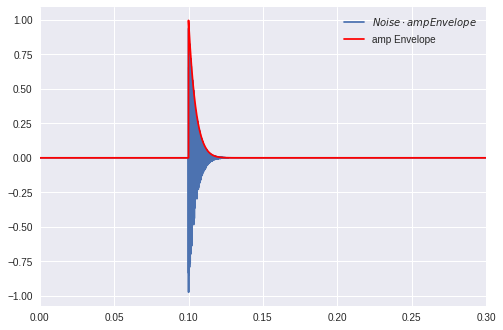

In [174]:
plot(t, exciter, label='$Noise \cdot ampEnvelope$')
plot(t, te, 'r', label='amp Envelope')
legend()
xlim([0,0.3])
show()

In [175]:
freq = 440
delLenSec = 1/freq#0.01 #Sec
delLenSamps = int(delLenSec*sr) #Samples
delay = zeros(delLenSamps)

In [176]:
writePos= 0
readPos = mod(writePos - delLenSamps, delLenSamps)
z1 = 0
Y = zeros_like(exciter)
for i in range(N):
    x = exciter[i]
    writePos += 1 
    writePos = mod(writePos, delLenSamps)
    readPos = mod(writePos - delLenSamps, delLenSamps)
    output = (x + delay[readPos] + z1)* 0.5
    z1 = output
    delay[writePos] = output
    Y[i] = output

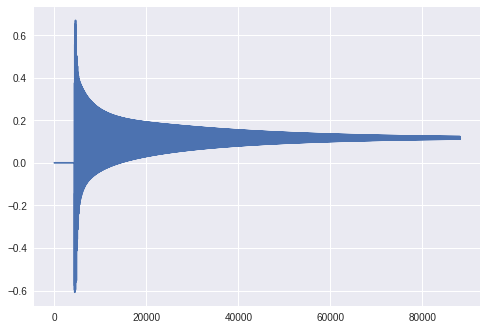

In [177]:
plot(Y)
show()

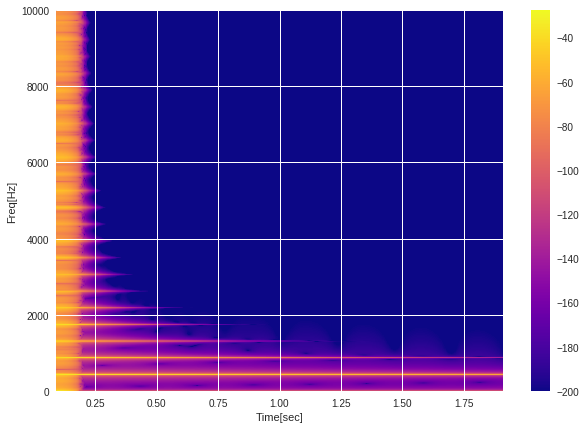

In [181]:
plt.figure(figsize=[10,7])
specgram(Y, Fs= sr, NFFT=2**13,noverlap=2**13-100, vmin=-200, cmap='plasma')
ylim([0,10000])
xlabel('Time[sec]')
ylabel('Freq[Hz]')
colorbar()
show()

In [179]:
Audio(data=Y, rate=sr)